<a href="https://colab.research.google.com/github/nhuyen183/LungCancerSupportSystem/blob/master/BRFSS_LogisticRegression9JAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import Libraries { vertical-output: true, display-mode: "both" }

import sqlite3
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

!pip install category_encoders
from category_encoders import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 3.0 MB/s eta 0:00:00


In [36]:
#@title df_structure { display-mode: "both" }

from  glob import glob
filenames = glob('./part*.csv')
appended_data = []  # create a list
for f in filenames:
  df = pd.read_csv(f, index_col=None)
  appended_data.append(df)  # append to the list
df_structure = pd.concat(appended_data, axis=0)
df_structure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211175 entries, 0 to 75640
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Gender             1211175 non-null  int64
 1   Age65              1211175 non-null  int64
 2   BMI                1211175 non-null  int64
 3   GeneralHealth      1211175 non-null  int64
 4   Smoked100          1211175 non-null  int64
 5   SmokerStatus       1211175 non-null  int64
 6   FirstSmokedAge     1211175 non-null  int64
 7   LastSmokedAge      1211175 non-null  int64
 8   AvgNumCigADay      1211175 non-null  int64
 9   HasCTScan          1211175 non-null  int64
 10  StopSmoking        1211175 non-null  int64
 11  HasAsthma          1211175 non-null  int64
 12  HasChronicDisease  1211175 non-null  int64
 13  HasLungCancer      1211175 non-null  int64
dtypes: int64(14)
memory usage: 138.6 MB


In [8]:
df=df_structure

In [37]:
#@title HasLungCancer { display-mode: "both" }
print (df["HasLungCancer"].value_counts())

0    75567
1       74
Name: HasLungCancer, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211175 entries, 0 to 75640
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Gender             1211175 non-null  int64
 1   Age65              1211175 non-null  int64
 2   BMI                1211175 non-null  int64
 3   GeneralHealth      1211175 non-null  int64
 4   Smoked100          1211175 non-null  int64
 5   SmokerStatus       1211175 non-null  int64
 6   FirstSmokedAge     1211175 non-null  int64
 7   LastSmokedAge      1211175 non-null  int64
 8   AvgNumCigADay      1211175 non-null  int64
 9   HasCTScan          1211175 non-null  int64
 10  StopSmoking        1211175 non-null  int64
 11  HasAsthma          1211175 non-null  int64
 12  HasChronicDisease  1211175 non-null  int64
 13  HasLungCancer      1211175 non-null  int64
dtypes: int64(14)
memory usage: 138.6 MB


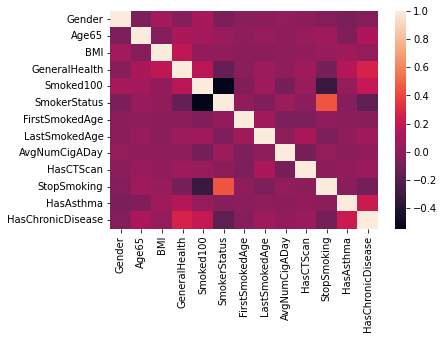

In [11]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="HasLungCancer").corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [19]:
# Create boxplot
sns.boxplot(x="HasLungCancer", y="height_ft_pre_eq", data=df)

# Label axes
plt.xlabel("Severe Damage")
plt.ylabel("Height")
plt.title("Distribution")

ValueError: ignored

In [38]:
X = df.drop(columns='HasLungCancer').values
y = df['HasLungCancer'].values

from imblearn.over_sampling import SMOTE
# transform the dataset
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

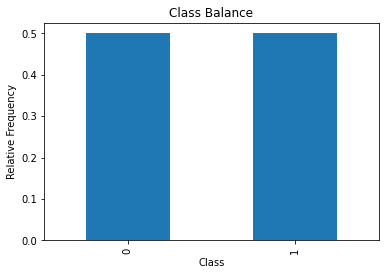

In [35]:
#@title Proportion "Severely Damaged" { display-mode: "both" }

# Plot value counts of `"severe_damage"`
y.value_counts(normalize=True).plot(kind="bar", xlabel = "Class" , ylabel = "Relative Frequency", title = "Class Balance")

In [23]:
majority_class_prop, minority_class_prop = y.value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.5 0.5


In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_test)
print(y_test)

[[0 1 3 ... 1 0 1]
 [1 0 3 ... 1 0 0]
 [0 1 4 ... 1 0 0]
 ...
 [0 0 3 ... 1 0 0]
 [0 0 4 ... 1 1 0]
 [0 0 2 ... 1 0 0]]
[1 0 1 ... 0 0 0]


In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
history = classifier.fit(X_train, y_train)

#acc_baseline = y_train.value_counts(normalize=True).max()
#print("Baseline Accuracy:", round(acc_baseline, 2))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

print(classifier.intercept_)
print(classifier.coef_)

[0.01787866]
[[-0.33632152  0.5290032  -0.40629927  0.68964877  0.87913732  0.33482807
  -0.05419475 -0.08579845  0.05117167  0.04309575 -0.09381249 -0.27530654
   0.63277692]]


In [31]:
import matplotlib.pyplot as plt
loss_train = history.history['train_loss']

loss_val = history.history['val_loss']

epochs = range(1,35)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

AttributeError: ignored

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=200, input_dim=13, activation='relu'))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(ann.summary())

# Training the ANN on the Training set
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs = 50, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               2800      
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
968/968 [==============================] - 6s 5ms/step - loss: 0.4061 - accuracy: 0.8305 - val_loss: 0.3312 - val_accuracy: 0.8529
Epoch 2/50
968/968 [==============================] - 5s 5ms/step - loss: 0.3129 - accuracy: 0.8611 - val_loss: 0.3051 - val_accuracy: 0.8680
Epoch 3/50
968/968 [=====

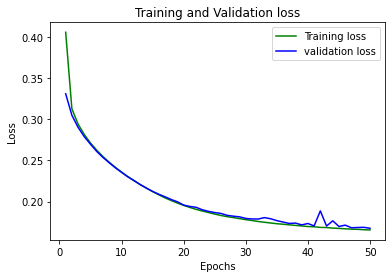

In [53]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

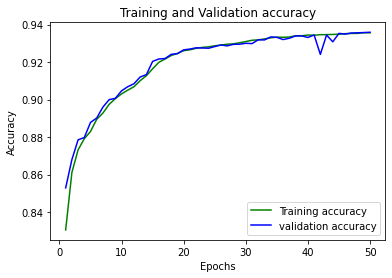

In [54]:
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()